# Classify tweets from the datatset as either as positive or negative
* here we have three columns id, label and tweets
* from that we are classifying tweets as inputs, and label as output & removing the column id
* by using different algorithms we need to classify tweets as positive or negative
*  here we need to check the accuracy of the model and predicting the best model by scores


## PREPROCESSING THE DATA:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv("/content/drive/My Drive/2020/train.csv", encoding = 'Latin-1')
dataset

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [3]:
dataset.shape

(31962, 3)

In [4]:
X_train = dataset.tweet
X_train.shape

(31962,)

In [5]:
y_train = dataset.label
y_train.shape

(31962,)

In [6]:
dataset.drop(['id'],axis = 1,inplace = True)
dataset.shape

(31962, 2)

In [7]:
dataset

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [8]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating an object for CountVectorizer
count_vectorizer = CountVectorizer()

In [9]:
#generate the word counts for the words in the documents
word_counts = count_vectorizer.fit(X_train) 
word_counts.get_feature_names()

['00',
 '000',
 '000001',
 '001',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0606',
 '0608',
 '0609',
 '0610',
 '0612',
 '0613',
 '0616',
 '0616ã',
 '0617',
 '0618',
 '0618ã',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '07788427999',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0k',
 '0shares',
 '0tolerancemovie',
 '0ã',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000ã',
 '1001',
 '10014',
 '10021',
 '10025',
 '10040',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happydaysã',
 '100happysongs',
 '100k',
 '100ml',
 '100ã',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '101ã',
 '1024x589',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '109',
 '10a',
 '10am',
 '10days',
 '10hr

In [10]:
#Converting to a array
convert_array = word_counts.transform(X_train).toarray()
convert_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
#Converting the array into a dataframe
df = pd.DataFrame(convert_array,columns = word_counts.get_feature_names())
df

00  000  000001  001  0099  00am  ...  â¾ã³â¾â  ãªâ  ãªâ²â  ãªâµâ  ã²â  ã³â¾â
0       0    0       0    0     0     0  ...        0    0      0      0    0      0
1       0    0       0    0     0     0  ...        0    0      0      0    0      0
2       0    0       0    0     0     0  ...        0    0      0      0    0      0
3       0    0       0    0     0     0  ...        0    0      0      0    0      0
4       0    0       0    0     0     0  ...        0    0      0      0    0      0
...    ..  ...     ...  ...   ...   ...  ...      ...  ...    ...    ...  ...    ...
31957   0    0       0    0     0     0  ...        0    0      0      0    0      0
31958   0    0       0    0     0     0  ...        0    0      0      0    0      0
31959   0    0       0    0     0     0  ...        0    0      0      0    0      0
31960   0    0       0    0     0     0  ...        0    0      0      0    0      0
31961   0    0       0    0     0     0  ...        0    0      0      0    0      0

[31962 rows x 41074 columns]

In [12]:
#TFIDF Vectorizer

#Import TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Initialize an object for the TFIDF Vectorizer
tfidf_vector = TfidfVectorizer()

In [13]:
#apply the tfidf to the data(X_train)
X_train_transformed = tfidf_vector.fit_transform(X_train)
X_train_transformed

<31962x41074 sparse matrix of type '<class 'numpy.float64'>'
	with 367513 stored elements in Compressed Sparse Row format>

In [14]:
#Feature Names
tfidf_vector.get_feature_names()

['00',
 '000',
 '000001',
 '001',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0606',
 '0608',
 '0609',
 '0610',
 '0612',
 '0613',
 '0616',
 '0616ã',
 '0617',
 '0618',
 '0618ã',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '07788427999',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0k',
 '0shares',
 '0tolerancemovie',
 '0ã',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1000ã',
 '1001',
 '10014',
 '10021',
 '10025',
 '10040',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happydaysã',
 '100happysongs',
 '100k',
 '100ml',
 '100ã',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '101ã',
 '1024x589',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '109',
 '10a',
 '10am',
 '10days',
 '10hr

In [15]:
#Position of the words in the sparse matrix
tfidf_vector.vocabulary_

{'user': 38194,
 'when': 39560,
 'father': 12983,
 'is': 18972,
 'dysfunctional': 11372,
 'and': 2385,
 'so': 33428,
 'selfish': 32089,
 'he': 16642,
 'drags': 11050,
 'his': 17080,
 'kids': 20139,
 'into': 18812,
 'dysfunction': 11371,
 'run': 31219,
 'thanks': 35995,
 'for': 13944,
 'lyft': 22194,
 'credit': 8969,
 'can': 6485,
 'use': 38185,
 'cause': 6858,
 'they': 36327,
 'don': 10839,
 'offer': 26124,
 'wheelchair': 39554,
 'vans': 38336,
 'in': 18243,
 'pdx': 27338,
 'disapointed': 10458,
 'getthanked': 14991,
 'bihday': 4714,
 'your': 40741,
 'majesty': 22404,
 'model': 23778,
 'love': 21850,
 'take': 35424,
 'with': 39942,
 'all': 2000,
 'the': 36042,
 'time': 36597,
 'urã': 38168,
 'factsguide': 12746,
 'society': 33483,
 'now': 25841,
 'motivation': 24083,
 'huge': 17584,
 'fan': 12861,
 'fare': 12895,
 'big': 4652,
 'talking': 35463,
 'before': 4213,
 'leave': 20905,
 'chaos': 7114,
 'pay': 27279,
 'disputes': 10578,
 'get': 14961,
 'there': 36254,
 'allshowandnogo': 2080,


In [16]:
#Idf of the terms   i.e weights assigned to the terms
tfidf_vector.idf_

array([ 7.44050863,  8.00503843, 10.27372197, ...,  9.42642411,
       10.67918708,  6.64494644])

# Applying Decision Tree Algorithm

In [17]:
testdata = pd.read_csv("/content/drive/My Drive/2020/ test.csv", encoding = 'Latin-1')
testdata

id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid Ã°ÂÂÂ #hairflip #nev...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]

In [18]:
testdata.drop(['id'],axis = 1 ,inplace = True)
testdata  

tweet
0      #studiolife #aislife #requires #passion #dedic...
1       @user #white #supremacists want everyone to s...
2      safe ways to heal your #acne!!    #altwaystohe...
3      is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew...
...                                                  ...
17192  thought factory: left-right polarisation! #tru...
17193  feeling like a mermaid Ã°ÂÂÂ #hairflip #nev...
17194  #hillary #campaigned today in #ohio((omg)) &am...
17195  happy, at work conference: right mindset leads...
17196  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 1 columns]

In [19]:
resultdata = pd.read_csv("/content/drive/My Drive/2020/result.csv", encoding = 'Latin-1')
resultdata

id  label
0      31963      0
1      31964      0
2      31965      0
3      31966      0
4      31967      0
...      ...    ...
17192  49155      1
17193  49156      0
17194  49157      0
17195  49158      0
17196  49159      0

[17197 rows x 2 columns]

In [20]:
resultdata.drop(['id'],axis = 1 ,inplace = True)
resultdata 

label
0          0
1          0
2          0
3          0
4          0
...      ...
17192      1
17193      0
17194      0
17195      0
17196      0

[17197 rows x 1 columns]

In [21]:
X_test_transformed = tfidf_vector.transform(testdata.tweet)
X_test_transformed

<17197x41074 sparse matrix of type '<class 'numpy.float64'>'
	with 183388 stored elements in Compressed Sparse Row format>

In [22]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#initailization of object
dtree = DecisionTreeClassifier()

# Applying the classifier to the dataset
# syntax: objectname.fit(InputValues, OutputValues)
dtree.fit(X_train_transformed, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
# Predict on training data
y_train_predicted = dtree.predict(X_train_transformed)
y_train_predicted

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
# Classification Report on training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29720
           1       1.00      1.00      1.00      2242

    accuracy                           1.00     31962
   macro avg       1.00      1.00      1.00     31962
weighted avg       1.00      1.00      1.00     31962



In [25]:
confusion_matrix(y_train, y_train_predicted)

array([[29720,     0],
       [    1,  2241]])

In [26]:
# Prediction on test data(unseen data)
# Syntax: objectname.predict(InputValues)
y_test_predicted =  dtree.predict(X_test_transformed)  #  corresponding output of X_test is stored in y_test
# Comapre the actual y_test values with model predicted y_test_pred values
print(classification_report(resultdata.label, y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     16282
           1       0.51      0.62      0.56       915

    accuracy                           0.95     17197
   macro avg       0.74      0.79      0.77     17197
weighted avg       0.95      0.95      0.95     17197



# logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [28]:
reg.fit(X_train_transformed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_test_pred_lg = reg.predict(X_test_transformed)

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(resultdata.label,y_test_pred_lg)

array([[16243,    39],
       [  487,   428]])

In [31]:
print(classification_report(resultdata.label,y_test_pred_lg))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16282
           1       0.92      0.47      0.62       915

    accuracy                           0.97     17197
   macro avg       0.94      0.73      0.80     17197
weighted avg       0.97      0.97      0.96     17197



In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(resultdata.label,y_test_pred_lg)

0.9694132697563529

### Naive bayes algorithm

In [34]:
# apply the naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB #import
model_BernNB = BernoulliNB() # object

In [35]:
#Applying the Algorithm
model_BernNB.fit(X_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [36]:
y_test_pred_nb = model_BernNB.predict(X_test_transformed)

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(resultdata.label,y_test_pred_nb)

array([[16234,    48],
       [  669,   246]])

In [38]:
print(classification_report(resultdata.label,y_test_pred_nb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     16282
           1       0.84      0.27      0.41       915

    accuracy                           0.96     17197
   macro avg       0.90      0.63      0.69     17197
weighted avg       0.95      0.96      0.95     17197



In [39]:
accuracy_score(resultdata.label,y_test_pred_nb)

0.9583066813979182

### Multinomial NB

In [40]:
# import BernNB
from sklearn.naive_bayes import MultinomialNB
multinb = MultinomialNB()
multinb.fit(X_train_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
#predicting on train data
y_test_pred_mnb = reg.predict(X_test_transformed)

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(resultdata.label,y_test_pred_mnb)

array([[16243,    39],
       [  487,   428]])

In [43]:
print(classification_report(resultdata.label,y_test_pred_mnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16282
           1       0.92      0.47      0.62       915

    accuracy                           0.97     17197
   macro avg       0.94      0.73      0.80     17197
weighted avg       0.97      0.97      0.96     17197



In [44]:
accuracy_score(resultdata.label,y_test_pred_mnb)

0.9694132697563529

COMPARISION:

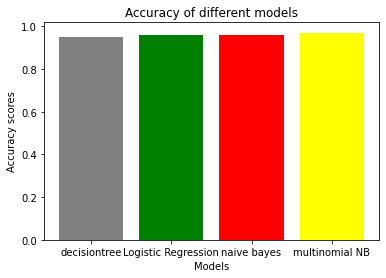

In [45]:
#Plot of accuracies
import matplotlib.pyplot as plt
models = ['decisiontree','Logistic Regression','naive bayes','multinomial NB']
acc_scores = [0.95,0.96,0.96,0.97]
plt.bar(models,acc_scores,color=['GREY','green','red','yellow'])
plt.ylabel("Accuracy scores")
plt.xlabel("Models")
plt.title("Accuracy of different models")
plt.show()